
# Project: Investigate TMDb Movie Dataset

## Table of Contents
><ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ol>

<a id='intro'></a>
## Introduction

I choose this dataset because I love movies, I thought it would be updated with movies from 2017 but the last movies are from 2015, still, it has really interesting information like budget and revenue from each movie. <br>

I have so many question for this dataset but for a matter of time, I'll just be answering two. The first one I chose it from the example questions, which genre are most popular within a period of time?. <br>

For the second question, I want to know information from a particular actress so I decided to choose Charlize Theron, but one actress is kinda simple so I came up with a comparison between another actress, Scarlett Johansson. So is kinda like Charlize vs Scarlett.



In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [117]:
# Loading data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [85]:
df.shape

(10866, 21)

> **Note**:This dataset has initially __10866 rows__ and __21 columns__.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [25]:
df.duplicated().sum()

1

In [26]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [80]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



#### After assessing the data I came with the next information:
<ul>
    <li>There a few __missing values__ in the columns: __imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.__</li>
    <li>The __release_date__ wich is a __date__ is storage as an __string__.</li>
    <li>There's only __1 duplicated row.__</li>
    <li>There __3 columns__ that stores more than two dates separeted by __|__ .</li>
    <li>Half of the values from budget and revenue are 0.</li>
</ul>

***

### Data Cleaning 
In order to get the data ready to use, these are the cleaning steps:
    
><ol>
    <li><a href="#step_1">Drop Columns</a></li>
    <li><a href="#step_2">Drop null, duplicated rows and 0 from budget and revenue</a></li>
    <li><a href="#step_3">Change string to datetime format</a></li>
    <li><a href="#step_4">Split string</a></li>
</ol>

<a id='step_1'></a>
#### 1. Drop the columns that I won't need

Reason about dropping:<br>
>__Homepage__ is about the website of the  movie.<br>
**Tagline** is the catchy phrase from the movie and useless for this analysis,although probably there's a relation between catchy words a revenues.<br>
**keywords** is an interesting information because I could relate the words with rate values but I'm already focusing on genres which use words kinda similar so for this time I'll omit this info.<br>
**imdb**_id there's two id and this one if referral from the site.

In [118]:
#Droping columns
df.drop(['homepage', 'tagline', 'overview', 'keywords', 'imdb_id'], axis=1, inplace=True)
df.shape

(10866, 16)

<a id='step_2'></a>
#### 2. Drop  duplicated rows and null values and 0
I'm dropping all the null values because most of them are a string that can't be replaceable with a mean or any kind of value, although if I had another dataset with this information I could have fill them.<br>

I also find out that most of the rows that don't have director are tv show or movies made for the tv, the rows that don't have cast most of them are animated movies or documentaries.

In [119]:
#drop the only duplicate value
df.drop_duplicates(inplace=True)
df.duplicated().sum() ##confirm the values drop


0

In [120]:
#drop the only duplicate value
df.dropna(inplace=True)
df.isnull().sum() ##confirm the null drop

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [121]:
#This drop all the values that have 0 in both columns
df=df.query('(budget > 0) and (revenue > 0)')

df.shape

(3805, 16)

>**Note:** I notice that more than the half of values where drop.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 505.4+ KB


<a id='step_3'></a>
#### 3. Change the release_date to datetime format

It is important that the information has the respective datatype so in this step I'm changing the __realease_date__ into datetime.

In [123]:
#set the new format
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 505.4+ KB


> **Note**: Now I can access the __realese_date__  quantities that I want through the __.dt accessor__.

<a id='step_4'></a>
#### 4. Splitting string that holds two or more values (Also known as the hard part)
I spent hours trying to figure it out this part, but eventually came up with this solution, probably not the most efficient but it works to solve the inquiries that I had about this dataset.

In [124]:
#First I split each row into 5 different columns an set them to save them in each different df  
#I was lucky in this part because the row to split only has 5 values and it replicates for each column that needs to split 
df_cast = pd.DataFrame(df['cast'])
df_cast = pd.DataFrame(df_cast.cast.str.split('|').tolist(),columns=['Cast_'+str(i) for i in range(0,5)])
df_genres = pd.DataFrame(df['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns=['Genres_'+str(i) for i in range(0,5)])
df_production_companies  = pd.DataFrame(df['production_companies'])
df_production_companies  = pd.DataFrame(df_production_companies.production_companies .str.split('|').tolist(),
                                        columns=['production_companies_'+str(i) for i in range(0,5)])


In [125]:
#This transpose each column and melt them into one column
df_cast=pd.melt(df_cast.transpose(), value_name='cast')
df_genres=pd.melt(df_genres.transpose(), value_name='genres')
df_production_companies=pd.melt(df_production_companies.transpose(), value_name='production_companies')

#This drop the variable column from each df
df_cast.drop(['variable'], axis=1, inplace=True)
df_genres.drop(['variable'], axis=1, inplace=True)
df_production_companies.drop(['variable'], axis=1, inplace=True)

In [126]:
#I no longer need the information from cast, genres, and production_companies because is gonna be replace with the new column 
#so in this part I drop them
df.drop(['cast','genres','production_companies'], axis=1, inplace=True)
df.shape

(3805, 13)

In [127]:
#In order to concatenate these new columns I need to have 5 rows for each movie displace one beneath the other and in the 
#same order as is was initially
df=pd.concat([df]*5,axis=0).sort_index().reset_index(drop=True)
df.shape

(19025, 13)

In [128]:
#Now I can concatenate the transpose columns with the new df with the new rows
df= pd.concat([df,df_cast,df_genres,df_production_companies],axis=1)
df.head(5)                                                         

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast,genres,production_companies
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Universal Studios
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard,Adventure,Amblin Entertainment
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan,Science Fiction,Legendary Pictures
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio,Thriller,Fuji Television Network
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson,None,Dentsu


In [129]:
#Example of new rows with the movie Jurasic World
df.query('original_title in ["Jurassic World"]')

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast,genres,production_companies
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Universal Studios
1,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Bryce Dallas Howard,Adventure,Amblin Entertainment
2,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Irrfan Khan,Science Fiction,Legendary Pictures
3,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Vincent D'Onofrio,Thriller,Fuji Television Network
4,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Nick Robinson,None,Dentsu


In [130]:
df.shape #We can confirmn the (3805*5) columns and (13 +3 new_ones) columns 

(19025, 16)

***

<a id='eda'></a>
## Exploratory Data Analysis
> I already said it but I had like millions of questions for this dataset but short time, so I came up with just these two:
<ol>
    <li><a href="#research1">Which genres are most popular between 2011 and 2013?</li>
    <li><a href="#research2">Scarlett Johansson vs Charlize Theron</li>
</ol> 

<a id='research1'></a>
### Research 1: Which genres are most popular between 2011 and 2013?
I find out that the years with more movies are 2011 and 2013, so for that reason, I'm gonna find out which genres are the most projected versus the most popular. <br>
This could be confusing but I can't assume for example, that horror is the most popular genre just because there are more movies about that genre, so that's why I'm going to analyze the number of movies by genre and finally the genre based on the percentage of votes (rating).

In [131]:
#groupby the movies by release year and sort them in descending
df.groupby('release_year').id.count().sort_values(ascending=False)[0:5]

release_year
2011    980
2013    895
2010    885
2009    850
2006    840
Name: id, dtype: int64

>**Note:** 2011 has 980 movies and 2013 has 895 movies.

In [134]:
df.groupby('genres').id.count().sort_values(ascending=False)

genres
Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: id, dtype: int64

>**Note:** In this dataset there are __20 diferent genres__ and the one with more movies are __Drama__ followed by __Comedy__.

In [139]:
#get data from 2011 and 2013
df_a=df.query('release_year == 2011')
df_b=df.query('release_year == 2013 ')

In [140]:
#Set top genres from 2011
df_a_gen=df_a.groupby('genres', sort=True).id.count()
df_a_gen=df_a_gen.sort_values(ascending=False)
df_a_gen=df_a_gen[0:5] ##Only 5 first

#Set top genres from 2013
df_b_gen=df_b.groupby('genres', sort=True).id.count()
df_b_gen=df_b_gen.sort_values(ascending=False)
df_b_gen=df_b_gen[0:5] ##Only 5 first

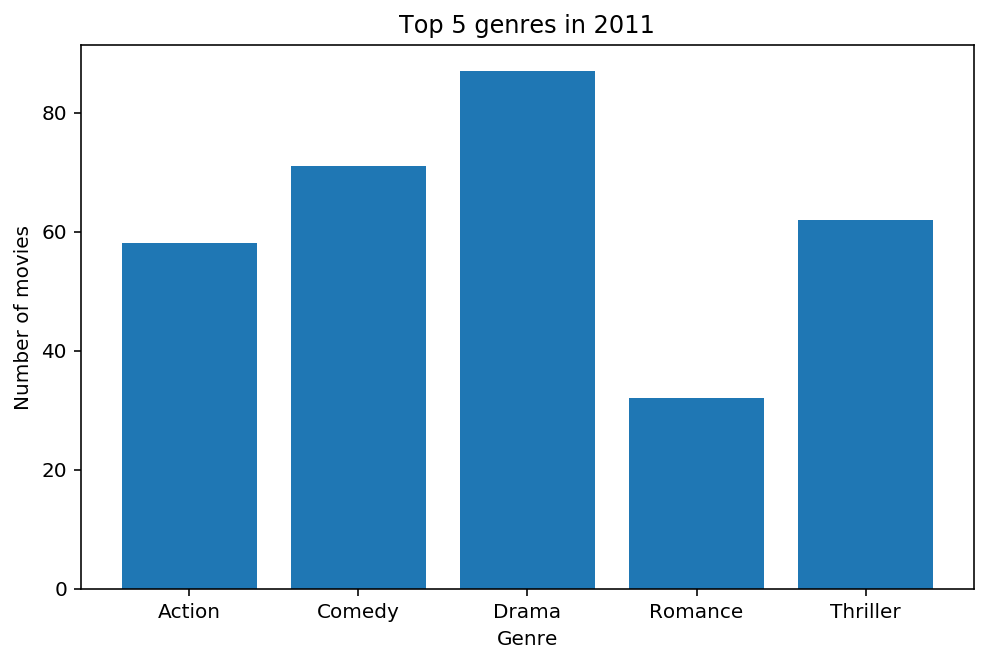

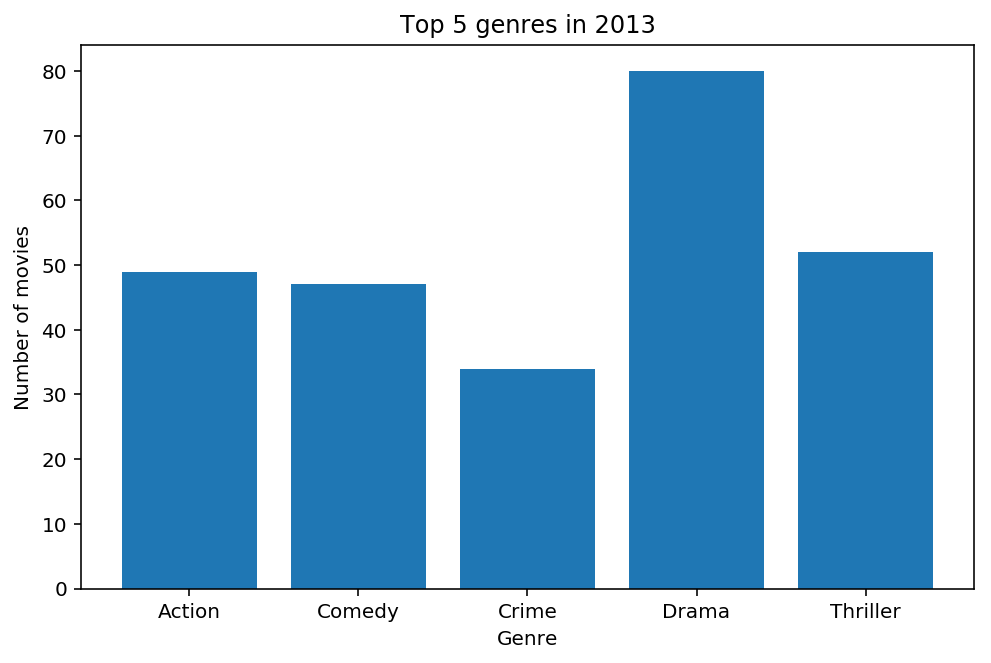

In [141]:
#plot bar from 2011
plt.subplots(figsize=(8, 5))
plt.bar(df_a_gen.index, df_a_gen)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Top 5 genres in 2011');

#plot bar from 2013
plt.subplots(figsize=(8, 5))
plt.bar(df_b_gen.index, df_b_gen)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Top 5 genres in 2013');

>**Note:** In both year Drama is the lead of the movies genres, this means that there more movies from this genre in each year.

I wanna know how much has change from a year to another, so I'm gonna plot the difference.

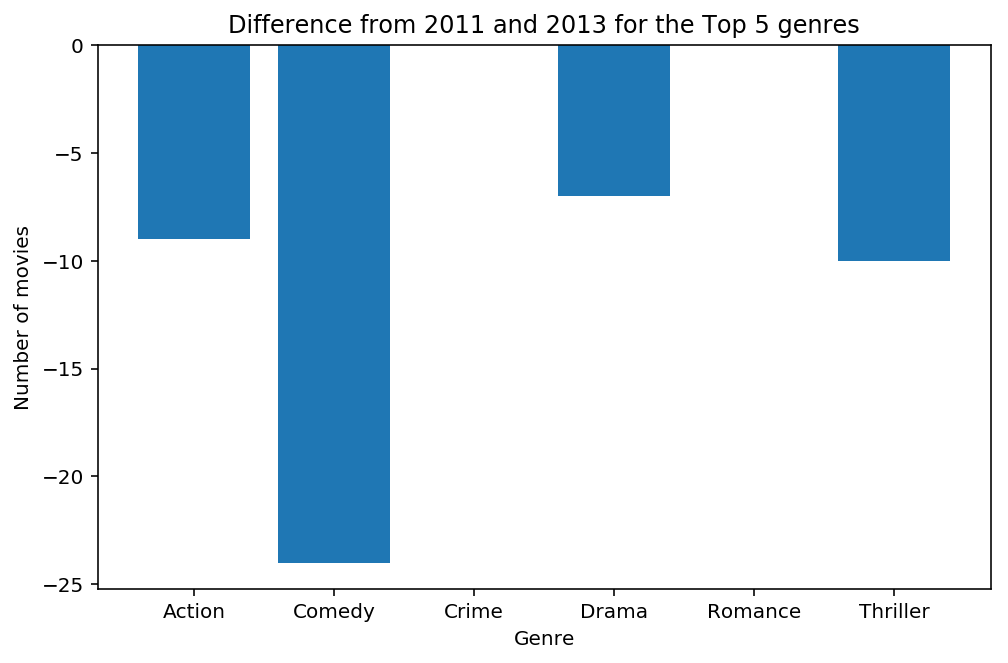

In [143]:
#simple rest between the two datasets
df_rest=df_b_gen-df_a_gen

#plotting the results
plt.subplots(figsize=(8, 5))
plt.bar(df_rest.index, df_rest)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Difference from 2011 and 2013 for the Top 5 genres');

>**Note:** When I compare the difference between 2011 and 2013, it can be seen that the genre that has fallen the most is comedy, followed by thriller. And I can't compare the values from crime and romance because those genres aren't in the top 5 in 2011.

In this part I wanna know the relation from genre vs the average value for each year, I wanna know wich genre is most popular from the value that it has.

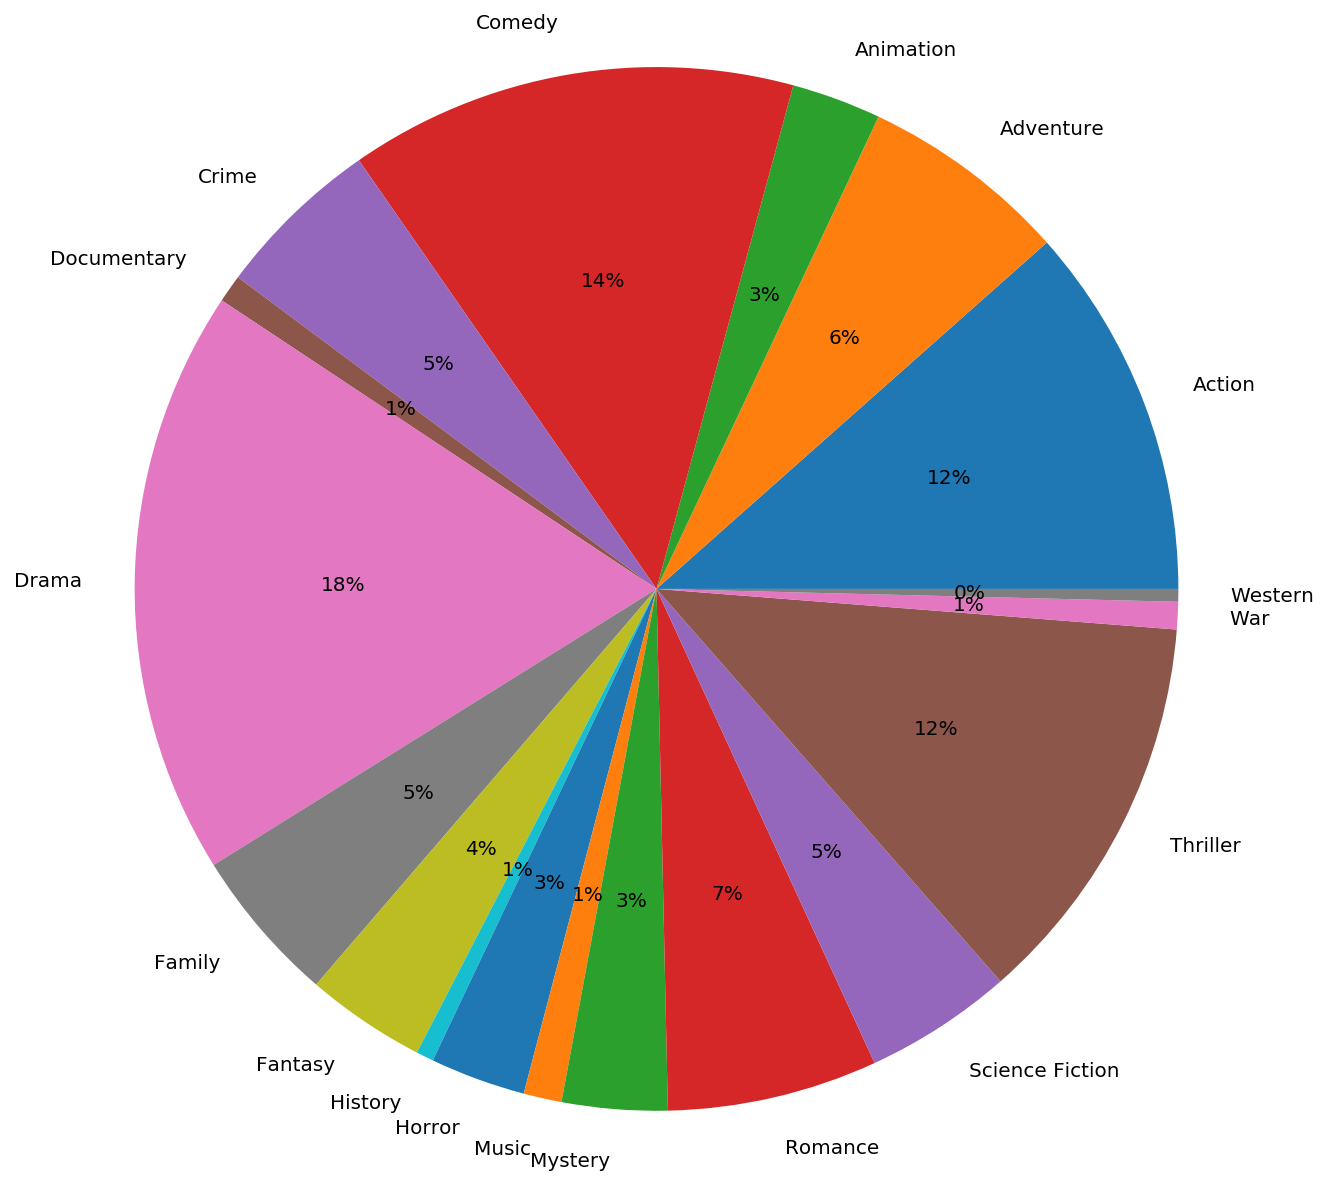

In [186]:
#Inside a pir chart I represent the % of genres taking as reference the vote_average in 2011
from matplotlib.pyplot import pie, axis, show
sums = df_a.groupby('genres', sort=True).vote_average.sum()##sum the vote_average from each genre
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=3);
show()

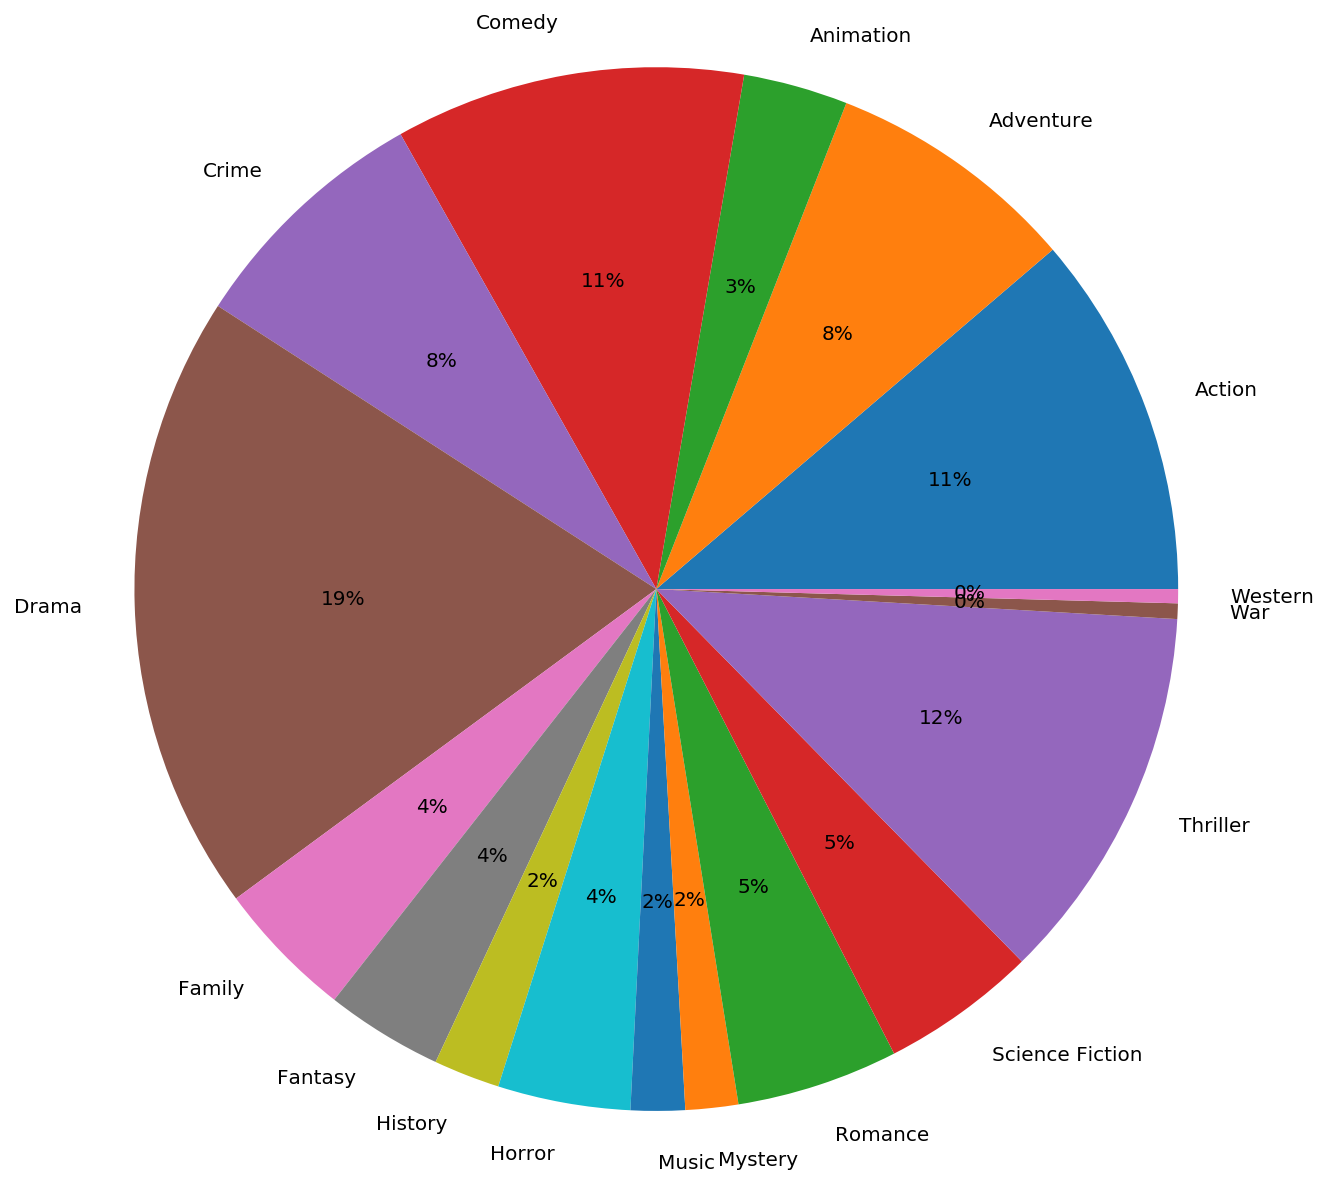

In [185]:
#Inside a pir chart I represent the % of genres taking as reference the vote_average in 2013
from matplotlib.pyplot import pie, axis, show
sums = df_b.groupby('genres', sort=True).vote_average.sum()##sum the vote_average from each genre
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=3);
show()

>**Note:** Of all the genres, drama is the one with the highest percentage of the best score in both years, which makes it the best-scored genre in both years, followed by comedy and action in 2011 but in 2013 is followed by thriller and comedy.

Also would be interesting know which genre of movies has made more revenues in each year. For each comparison between budget and review, I use the one associated with the inflation because is a better parameter of comparison.

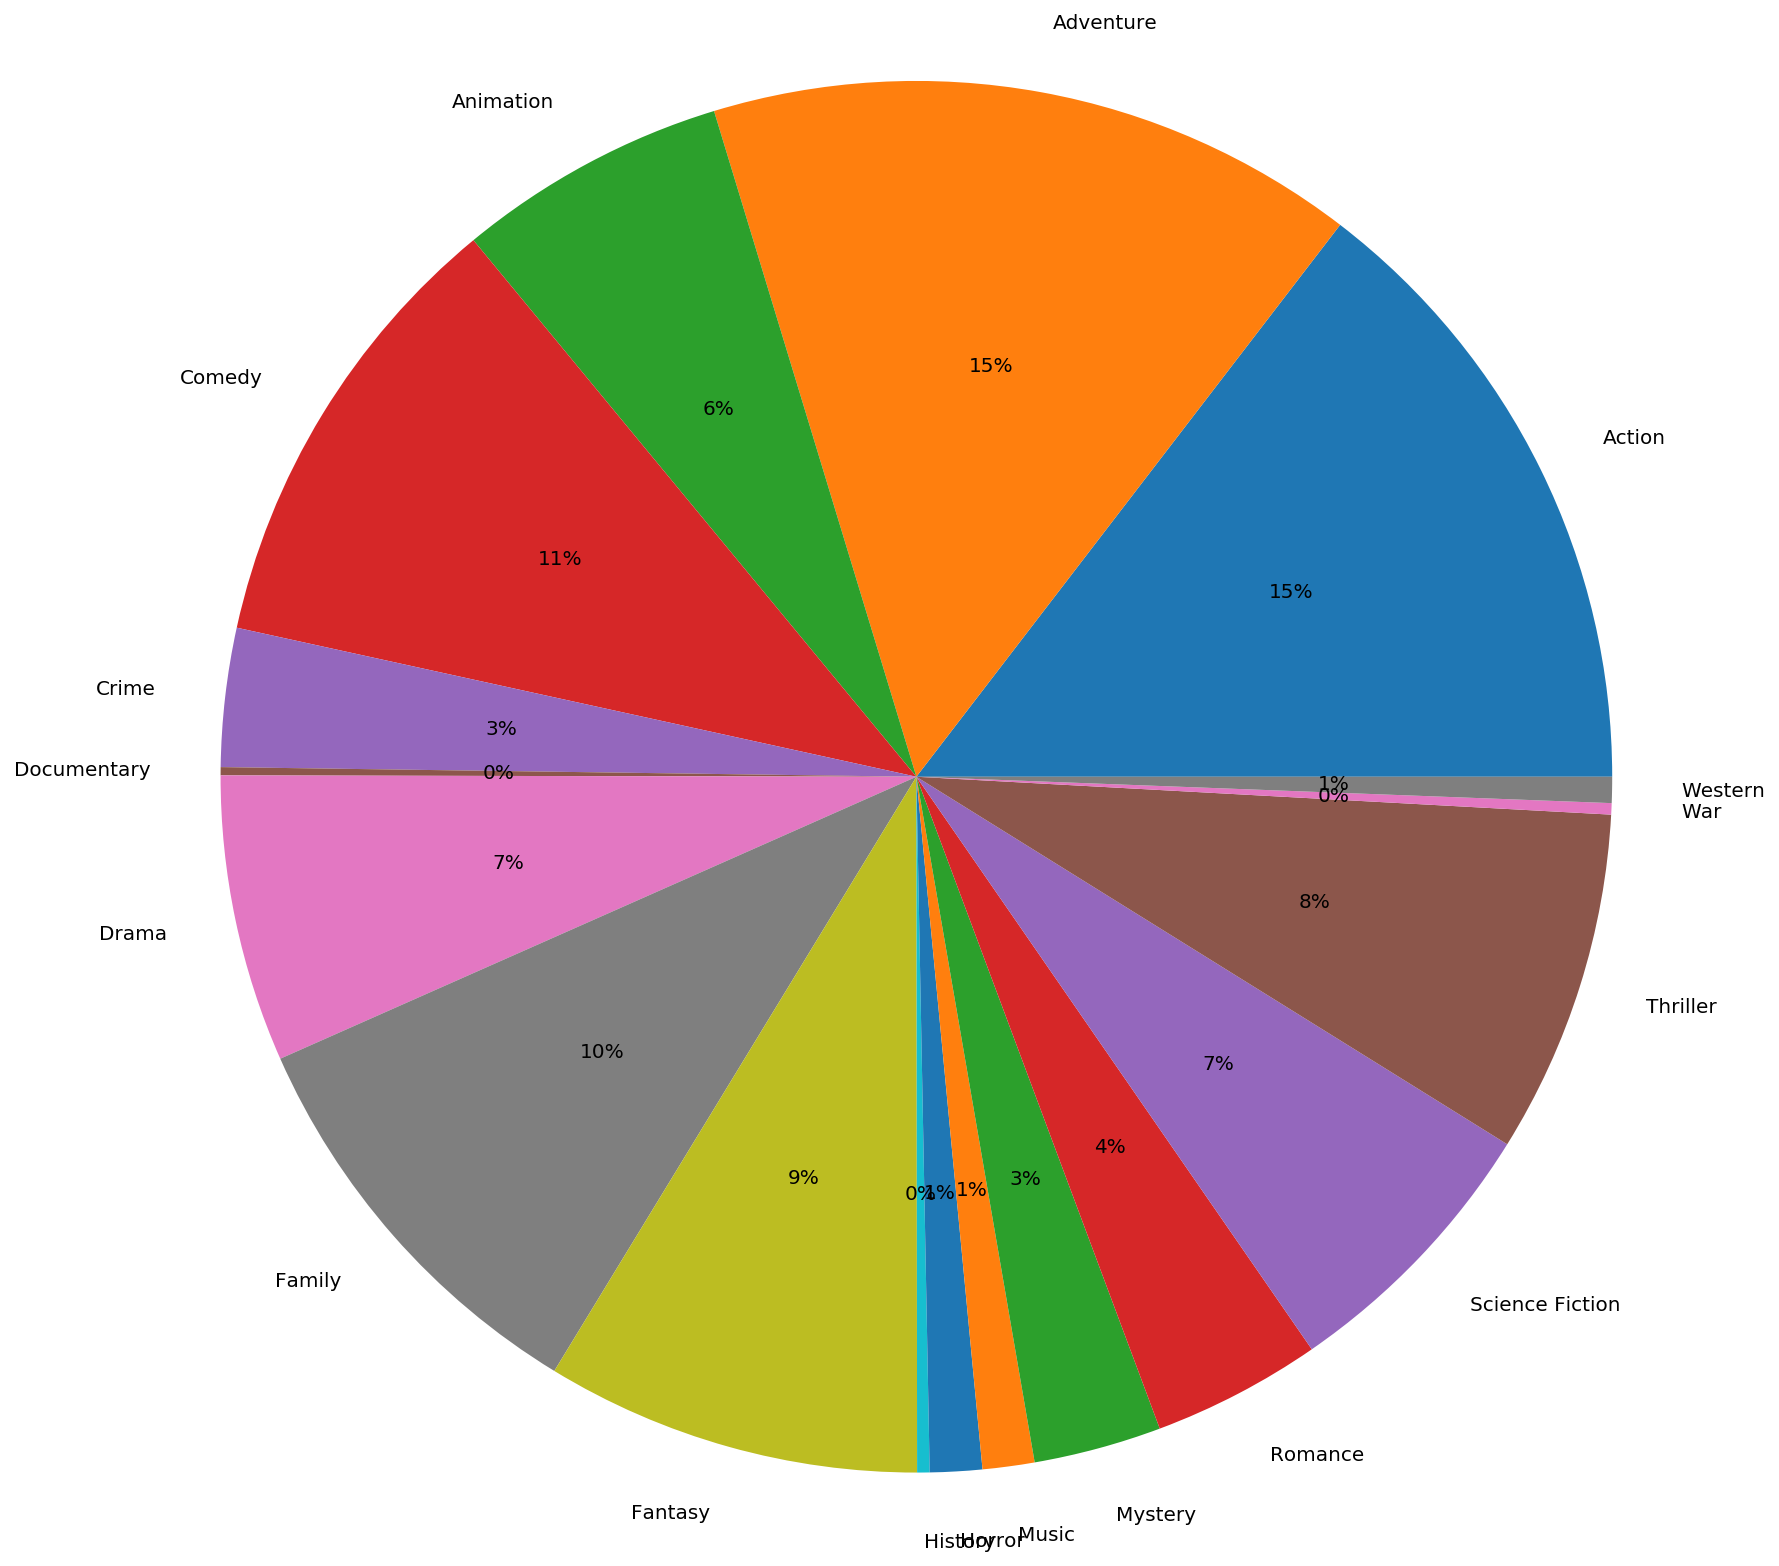

In [184]:
#Percentage of movies by genres bases in the revenue in 2011
from matplotlib.pyplot import pie, axis, show
sums = df_a.groupby('genres', sort=True).revenue_adj.sum()
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=4);
show()

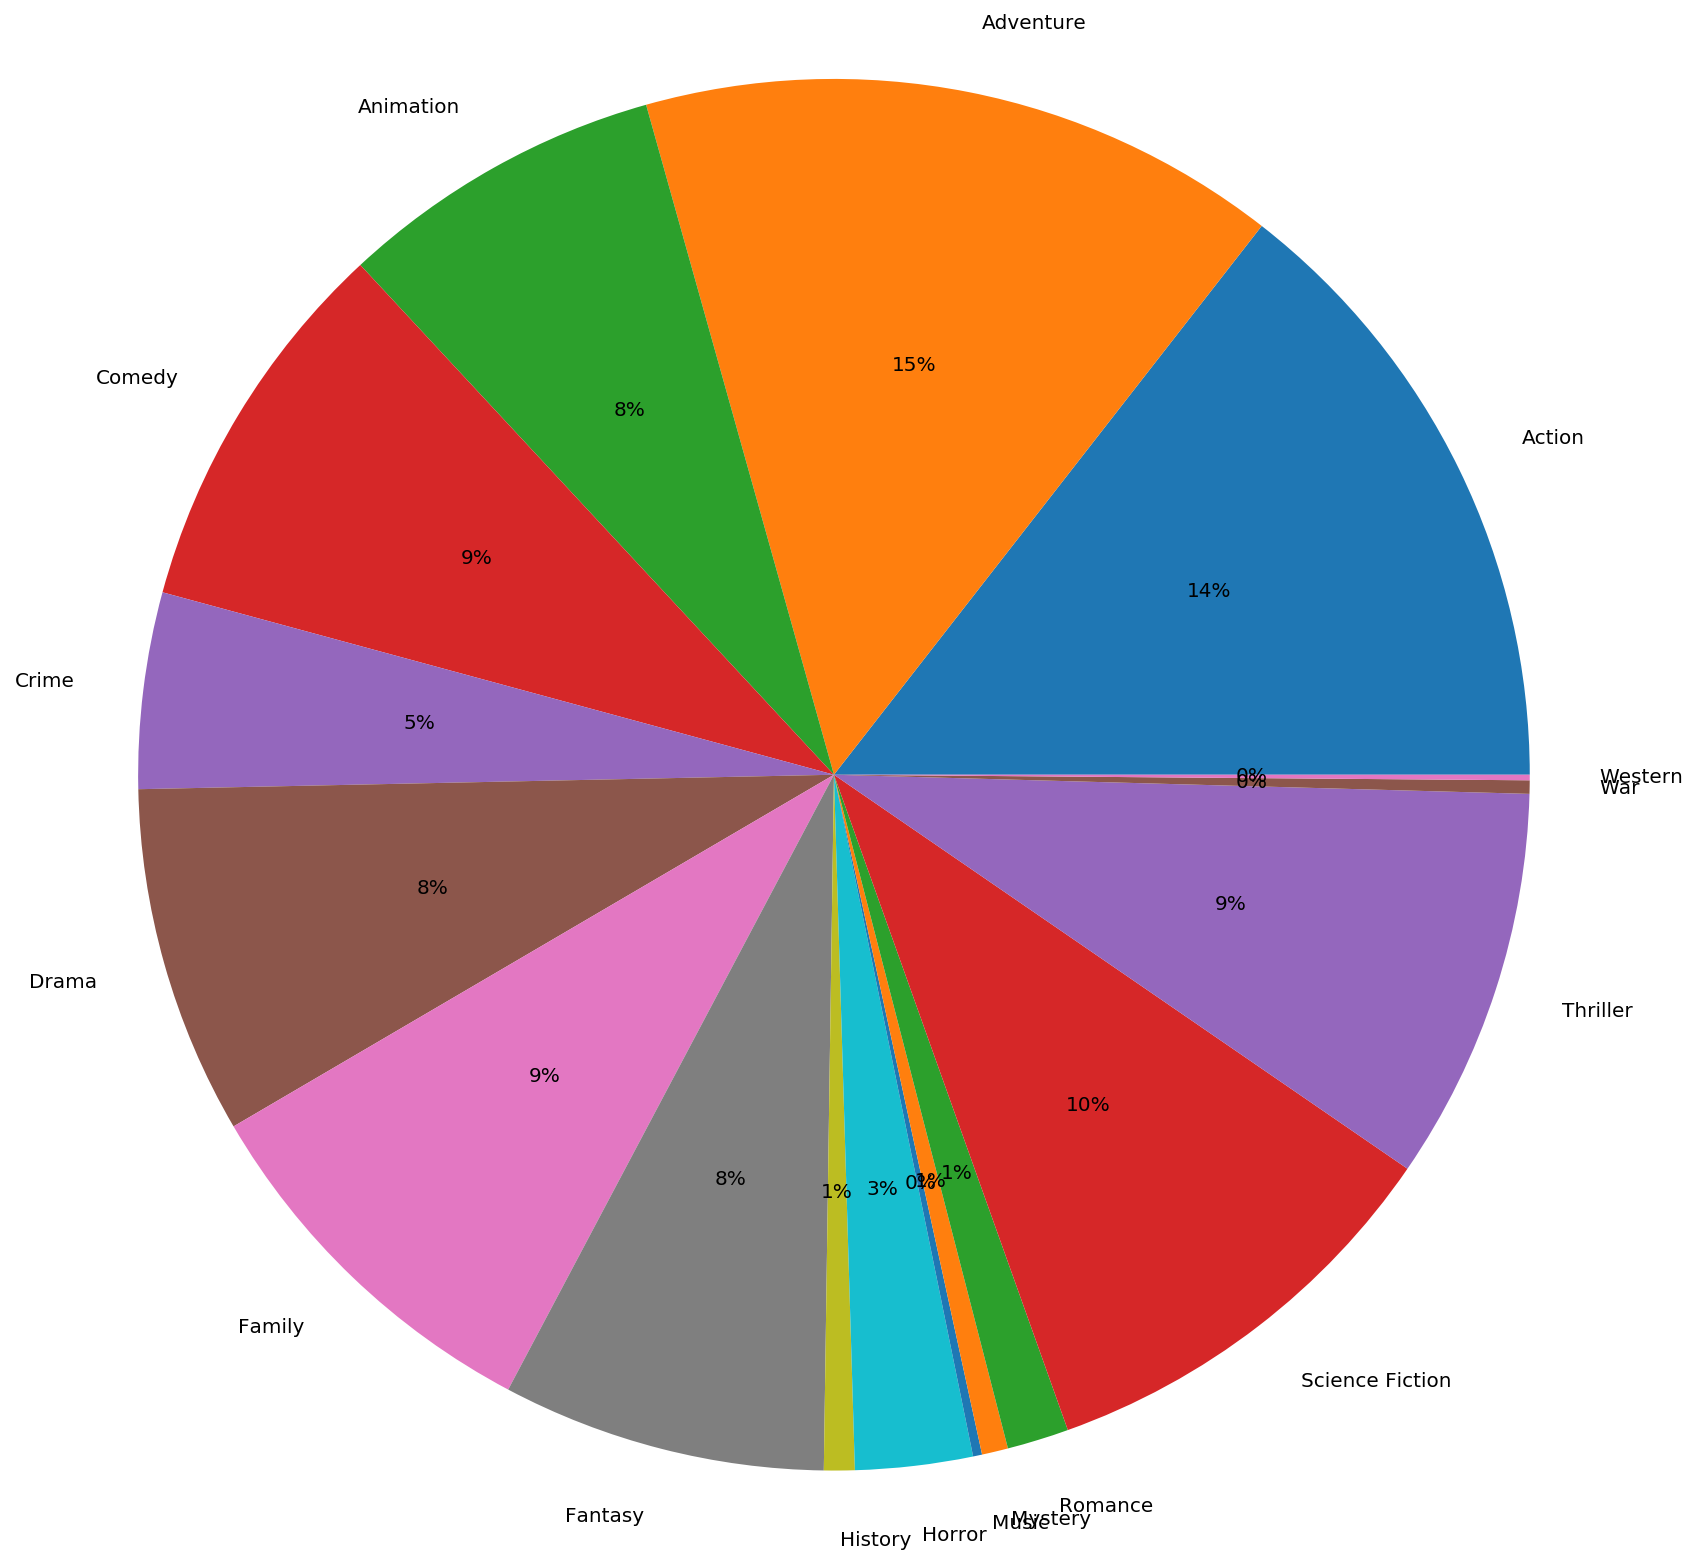

In [181]:
#Percentage of movies by genres bases in the revenue in 2013
from matplotlib.pyplot import pie, axis, show
sums = df_b.groupby('genres', sort=True).revenue_adj.sum()
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=4);
show()

>**Note**: In 2011, adventure and action are tie in the highest percentage of income, followed by  comedy. But in 2013, adventure is in the first place, followed by action and science fiction.

And what about the budget, what genres have more budget assigned?

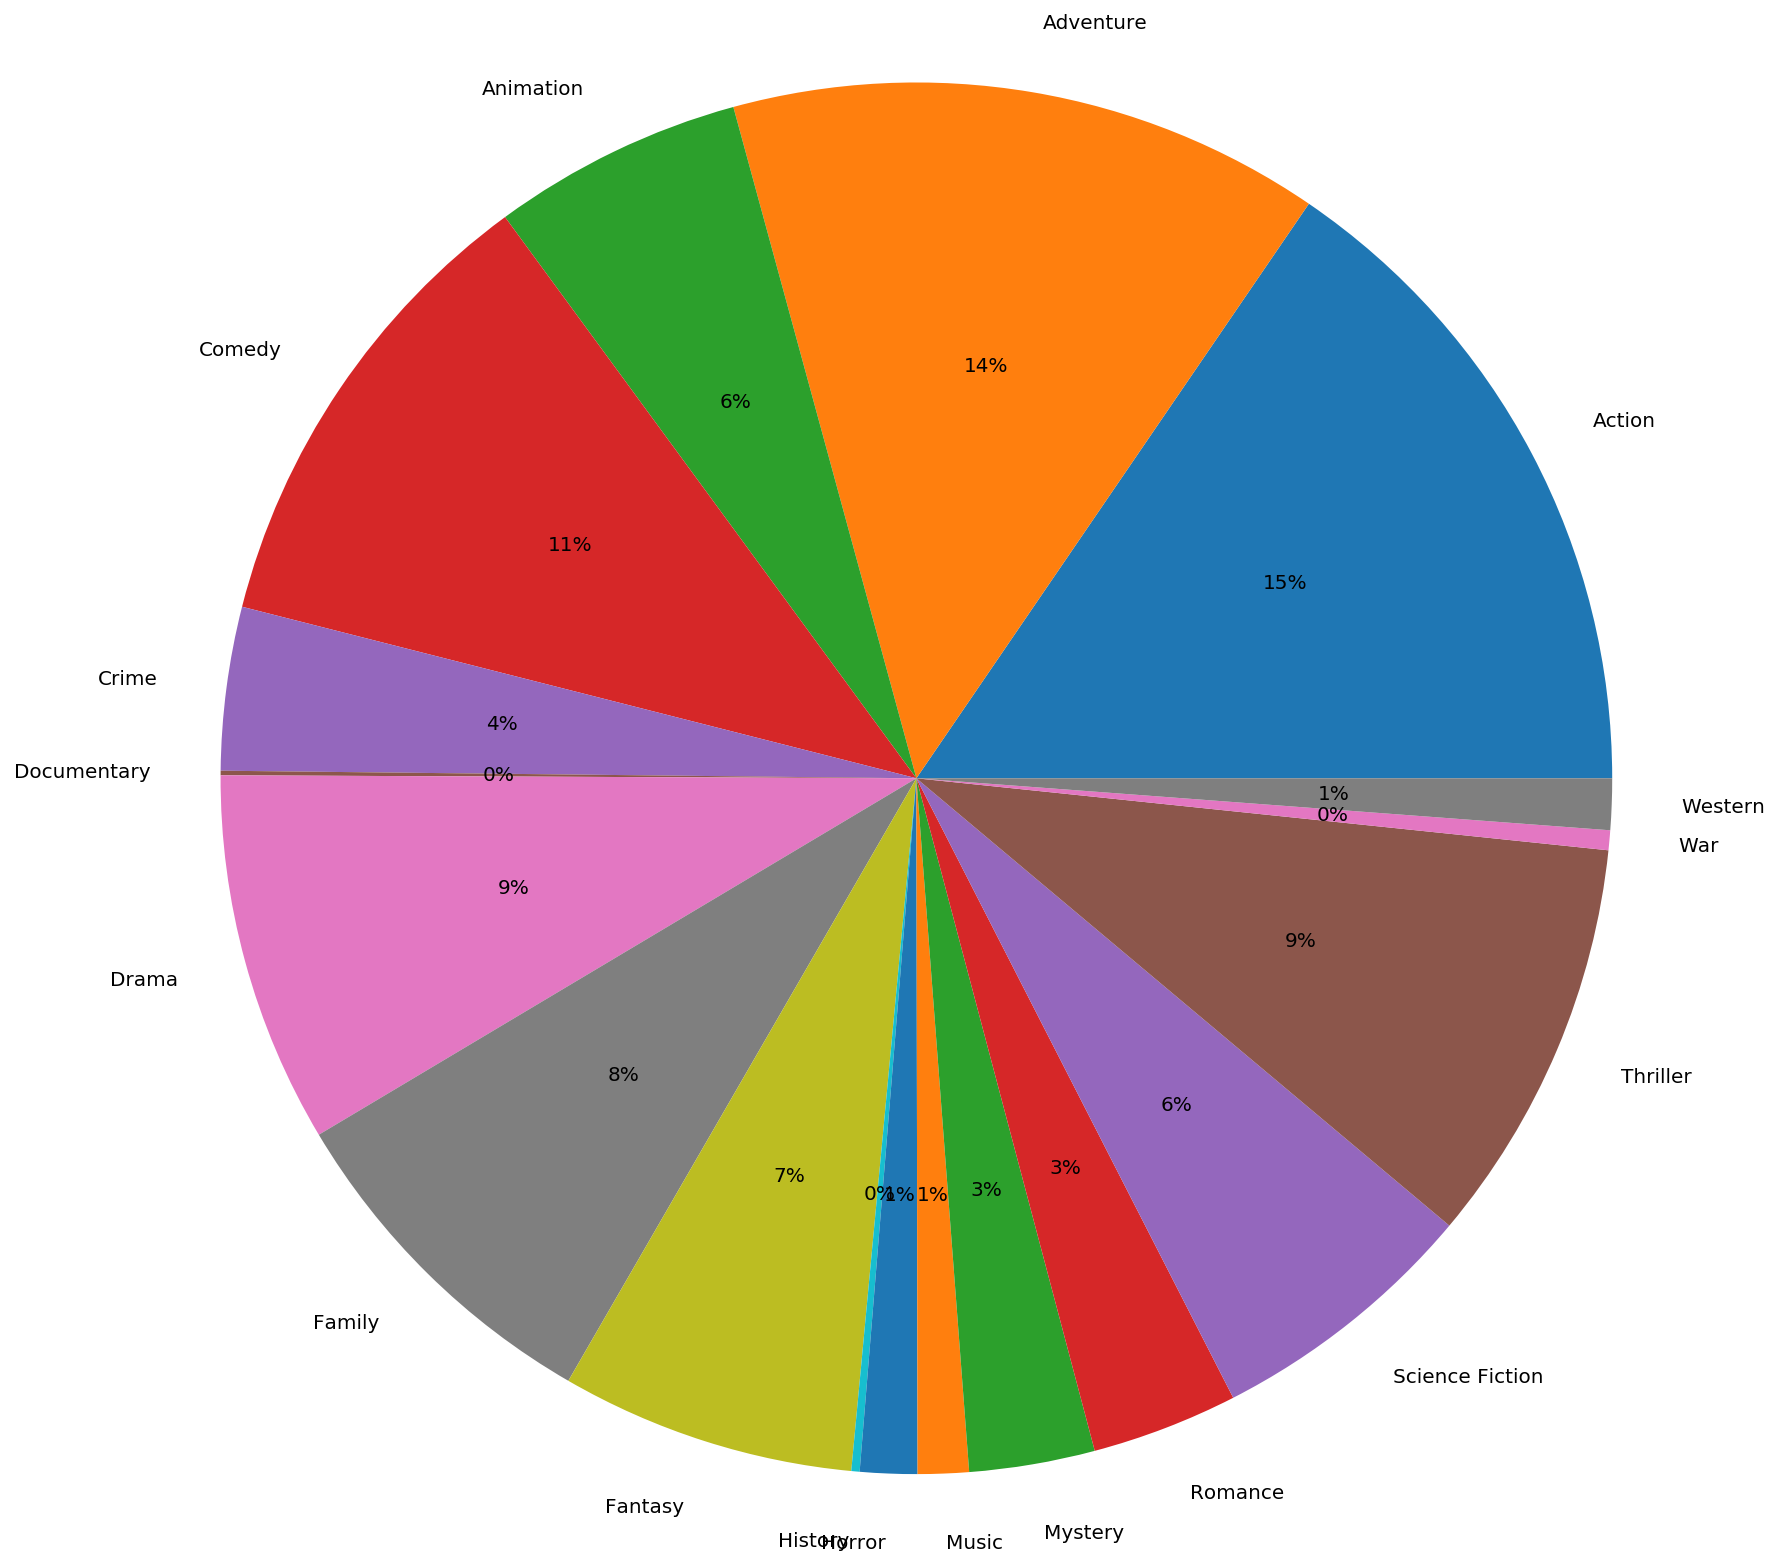

In [182]:
#Percentage of movies by genres bases in the budget in 2011
from matplotlib.pyplot import pie, axis, show
sums = df_a.groupby('genres', sort=True).budget_adj.sum()
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=4);
show()

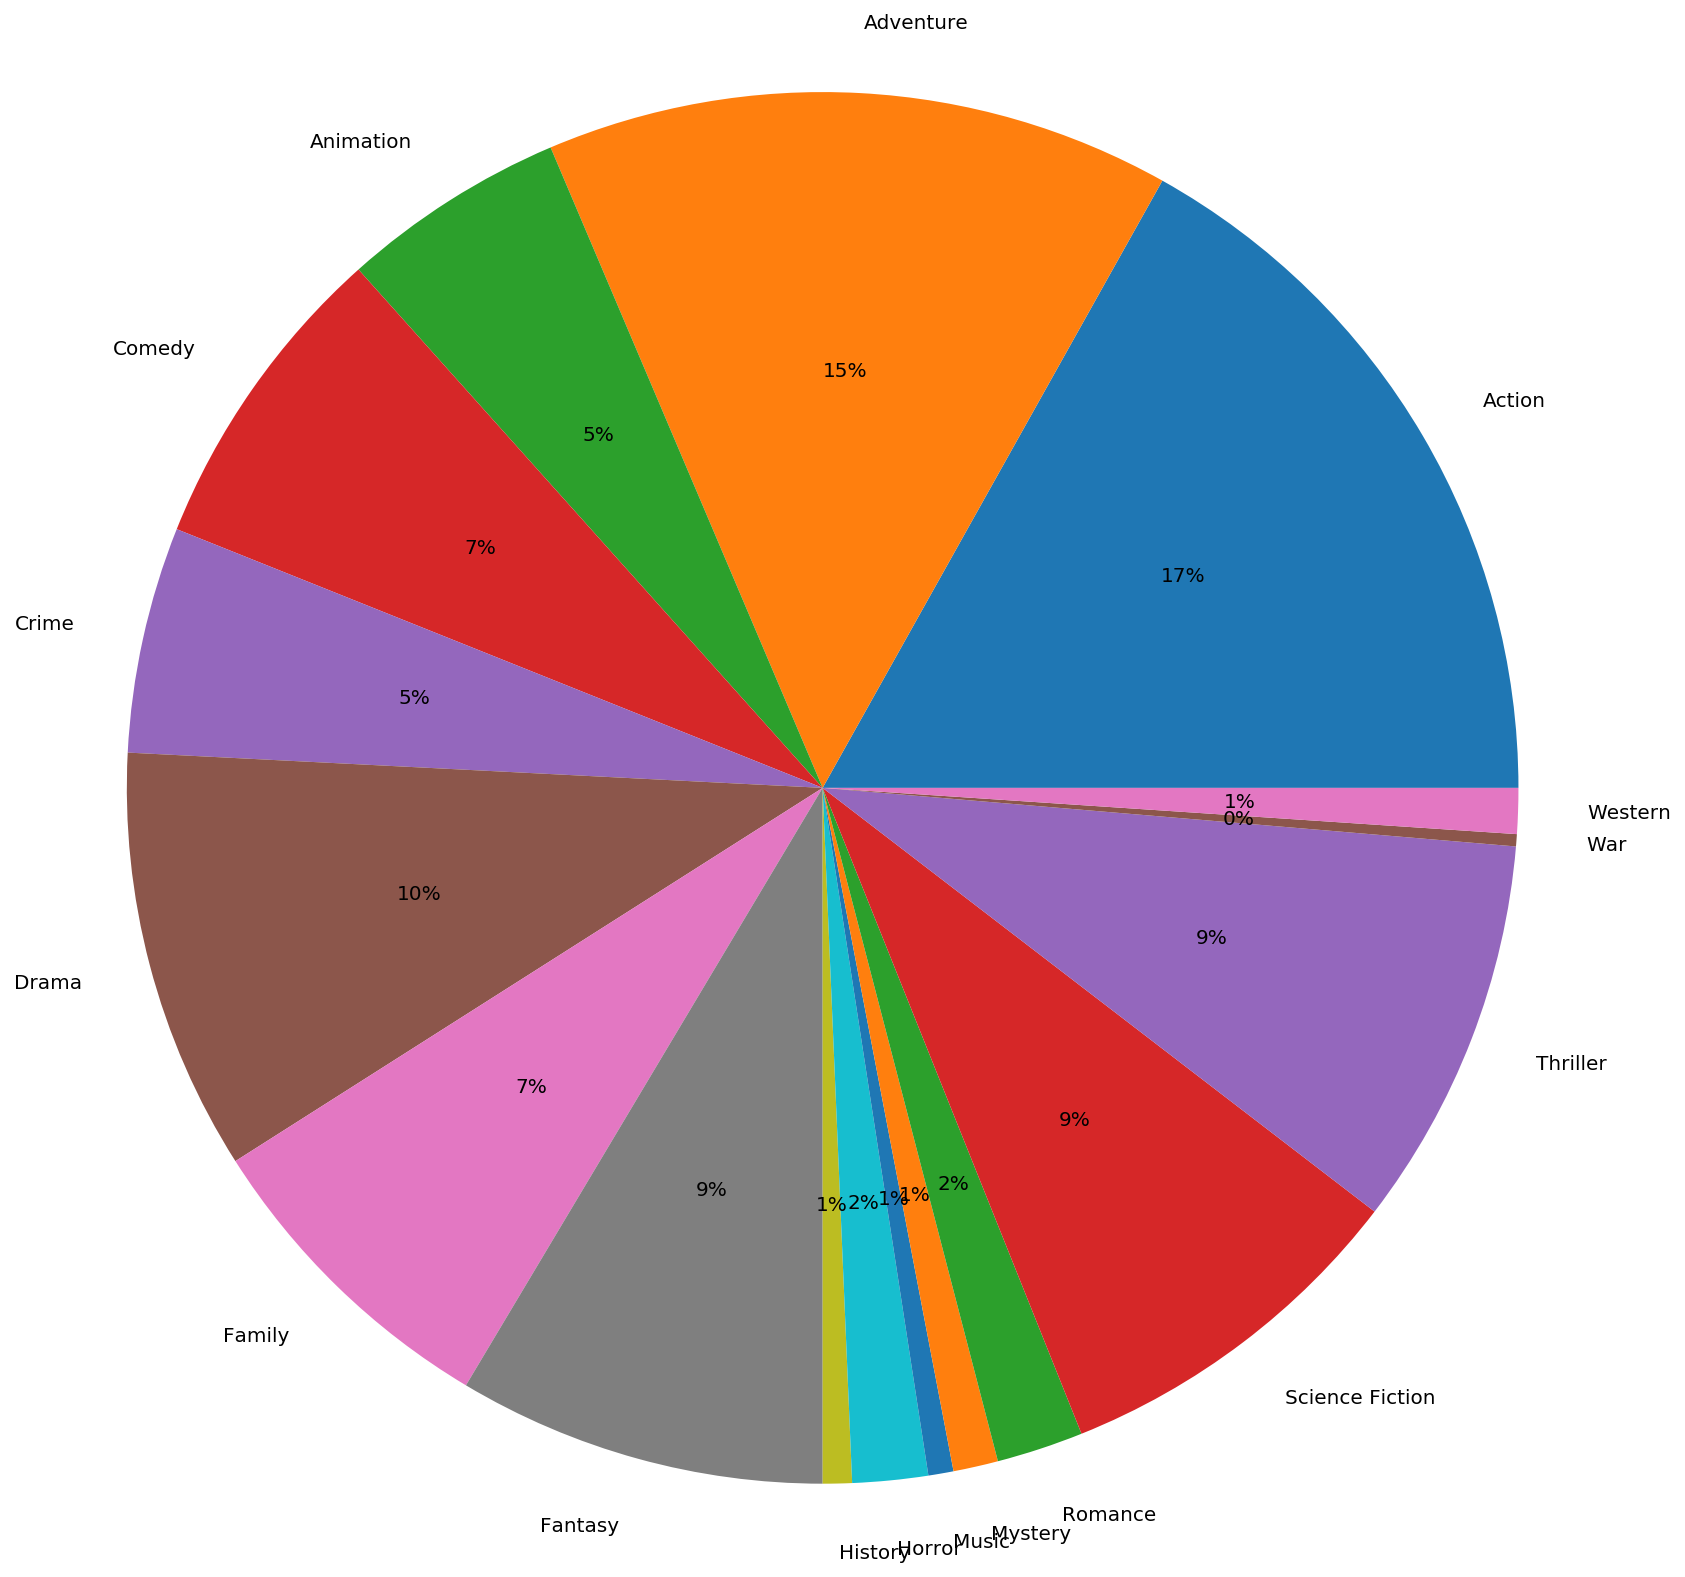

In [190]:
#Percentage of movies by genres bases in the budget in 2013
from matplotlib.pyplot import pie, axis, show
sums = df_b.groupby('genres', sort=True).budget_adj.sum()
axis('equal');
pie(sums, labels=sums.index, autopct='%.0f%%',radius=4);
show()

>**Note**: Both pie charts have the similar result, in the first place is action, followed by adventure but in 2011 comedy is in third place, instead in 2013 drama is in third place.

***

<a id='research2'></a>
### Research: Charlize Theron vs Scarlett Johansson
I have to start, saying that both of them are awesome so this isn't about choosing which one is the best, I just wanna made differents comparisons to get insight from each other, for example, how many movies each actress has made, how much they have raised from all the movies. I'll come with more questions to analyze in the process.

First I wanna know how many movies has made each actress.

In [144]:
#count number of movies
df.query('cast in ["Charlize Theron"]').id.count()

22

In [157]:
#count number of movies
df.query('cast in ["Scarlett Johansson"]').id.count()

20

>**Note**: Charlize Theron has made 22 movies according to this dataset and Scarlett Johansson 20 movies.

In [158]:
#Define two df for each actress
df_scar=df.query('cast in ["Scarlett Johansson"]')
df_char=df.query('cast in ["Charlize Theron"]')

Now I'll plot some comparison from each actress, this one are from the length of the movies.

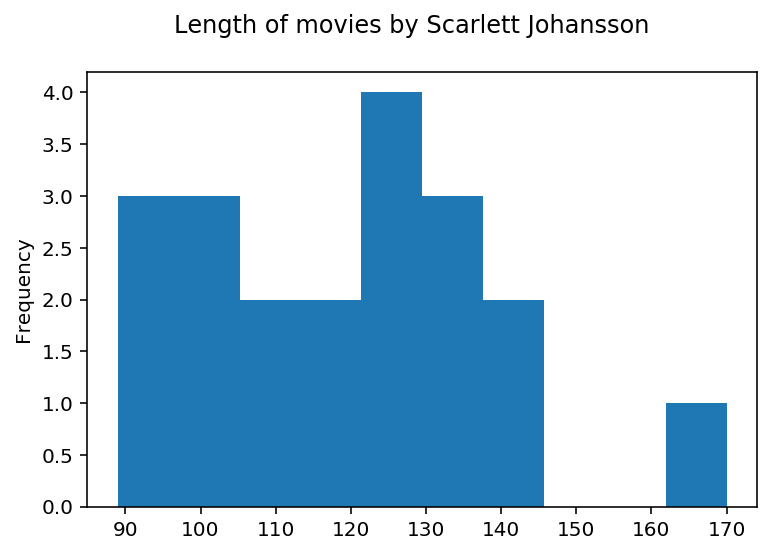

In [160]:
#chart for the length of the movie
df_scar['runtime'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Length of movies by Scarlett Johansson' );

In [165]:
#calculate the mean of runtime
df.query('cast in ["Scarlett Johansson"]').runtime.mean()

119.6

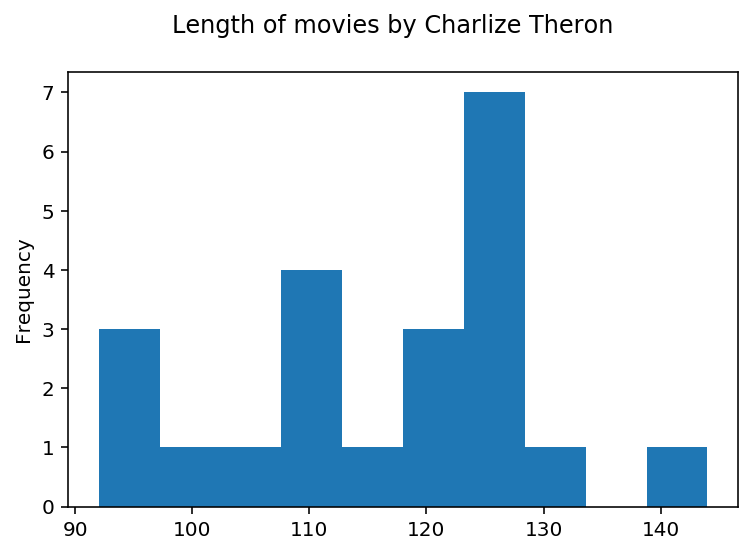

In [162]:
#chart for the length of the movie
df_char['runtime'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Length of movies by Charlize Theron' );

In [164]:
#calculate the mean of runtime
df.query('cast in ["Charlize Theron"]').runtime.mean()

115.77272727272727

>**Note:** Scarlett has more movies around 120 - 130 min of length, way close is Charlize inside in the same range, with more movies around 125 - 130 min of length. 

In this part, I wanted to compare the punctuation (vote average) from each movie that these actress made.

In [166]:
#Group by the vote average for Scarlett Johansson
df_scar_vot=df_scar.groupby('vote_average', sort=True).id.count()
#df_scar_vot=df_scar_vot.sort_values(ascending=False)

#Group by the vote average for Charlize Theron
df_char_vot=df_char.groupby('vote_average', sort=True).id.count()

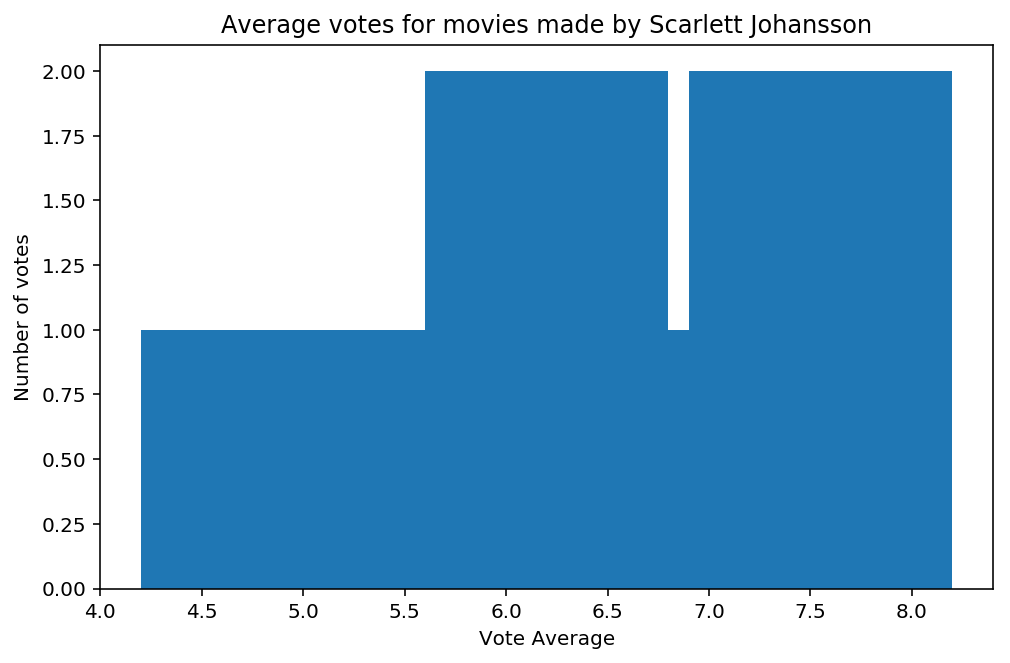

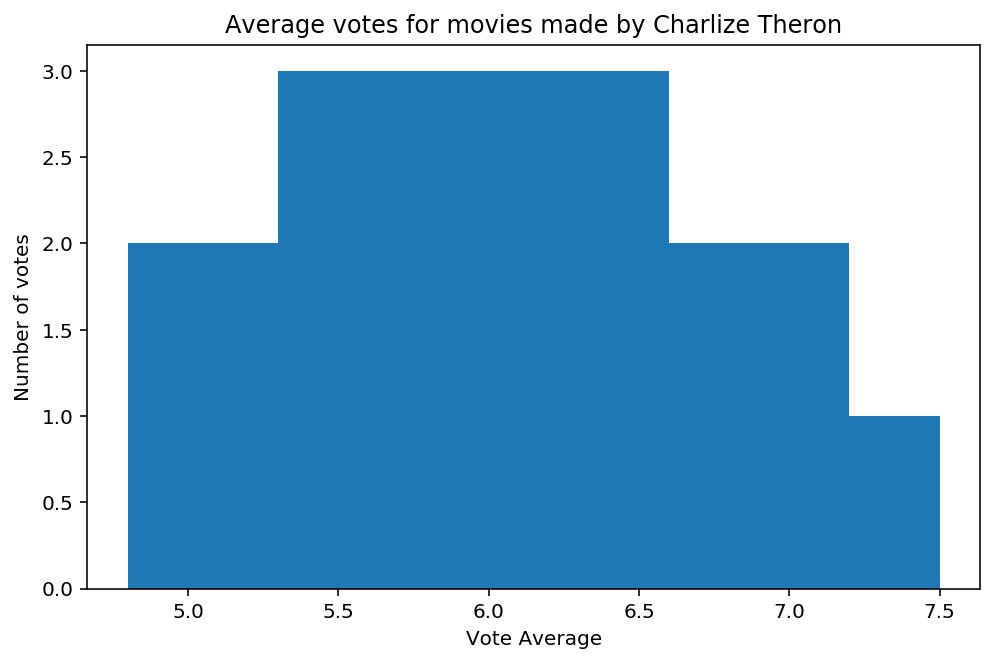

In [175]:
#plot bar for Scarlett Johansson
plt.subplots(figsize=(8, 5))
plt.bar(df_scar_vot.index, df_scar_vot)
plt.xlabel('Vote Average')
plt.ylabel('Number of votes')
plt.title('Average votes for movies made by Scarlett Johansson');

#plot bar from Charlize Theron
plt.subplots(figsize=(8, 5))
plt.bar(df_char_vot.index, df_char_vot)
plt.xlabel('Vote Average')
plt.ylabel('Number of votes')
plt.title('Average votes for movies made by Charlize Theron');


>**Note:** Most of Scarlet movies are rated between (5.5 - 6.7) and (7 - 8) approximately, in the case of Charlize, most of her movies are rated between 5.4 - 6.5.

I also want to know which actress has more revenues and budget assigned in general from all the movies they have made.

In [187]:
#Sums the revenues made by each actress
sum_rev_scar=df_scar.revenue_adj.sum()
sum_rev_char=df_char.revenue_adj.sum()

#Sums the budget made by each actress
sum_bud_scar=df_scar.budget_adj.sum()
sum_bud_char=df_char.budget_adj.sum()

print_this={'Sum_revenue_scarlett':sum_rev_scar,'Sum_revenue_charlize':sum_rev_char,'Sum_budget_scarlett':sum_bud_scar,
    'Sum_budget_charlize':sum_bud_char}
print(print_this)

{'Sum_revenue_scarlett': 5822773011.7003584, 'Sum_revenue_charlize': 2849747529.4176283, 'Sum_budget_scarlett': 1436932493.8990436, 'Sum_budget_charlize': 1420465255.2682393}


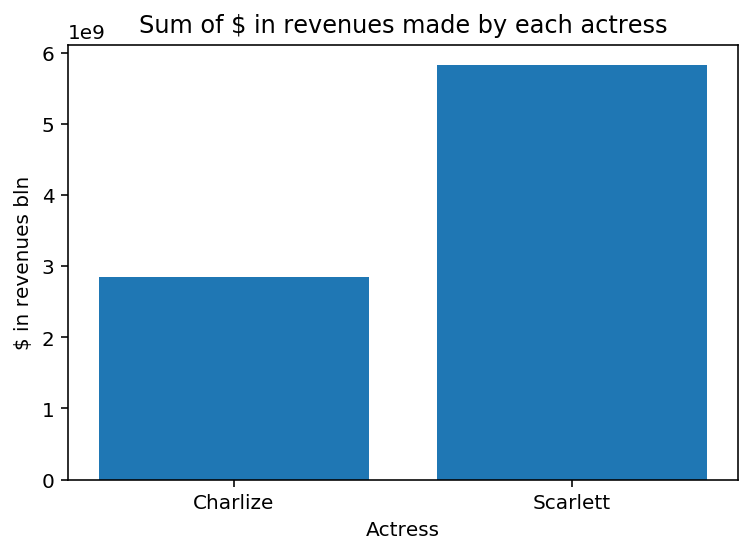

In [169]:
#plot the comparison of revenues
plt.bar(["Scarlett", "Charlize"], [sum_rev_scar, sum_rev_char])
plt.title("Sum of $ in revenues made by each actress")
plt.xlabel("Actress")
plt.ylabel("$ in revenues bln");

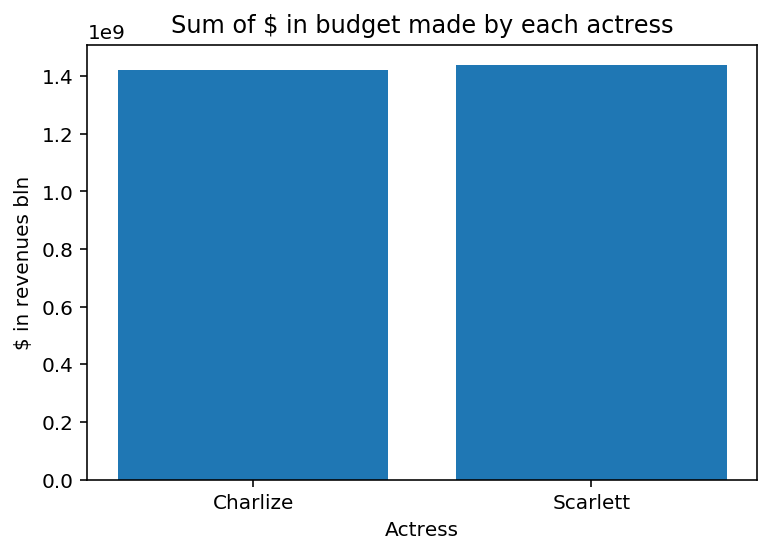

In [170]:
#plot the comparison of budgets
plt.bar(["Scarlett", "Charlize"], [sum_bud_scar, sum_bud_char])
plt.title("Sum of $ in budget made by each actress")
plt.xlabel("Actress")
plt.ylabel("$ in revenues bln");

>**Note:** Looks like Charlize Theron movies has made fewer revenues than Scarlett movies, in the case of budget Scarlet has more budget assigned to her movies than Charlize, but by a minimal difference.

I want to know which genres are more frequent use in the movies made by each actress, so I plot the result of the top 5 genres.

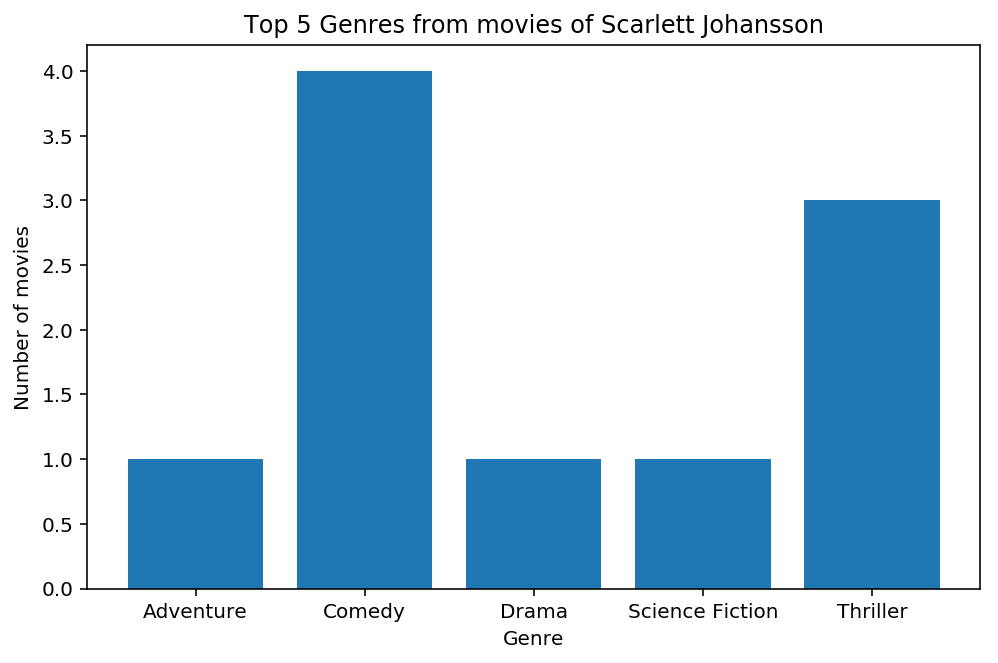

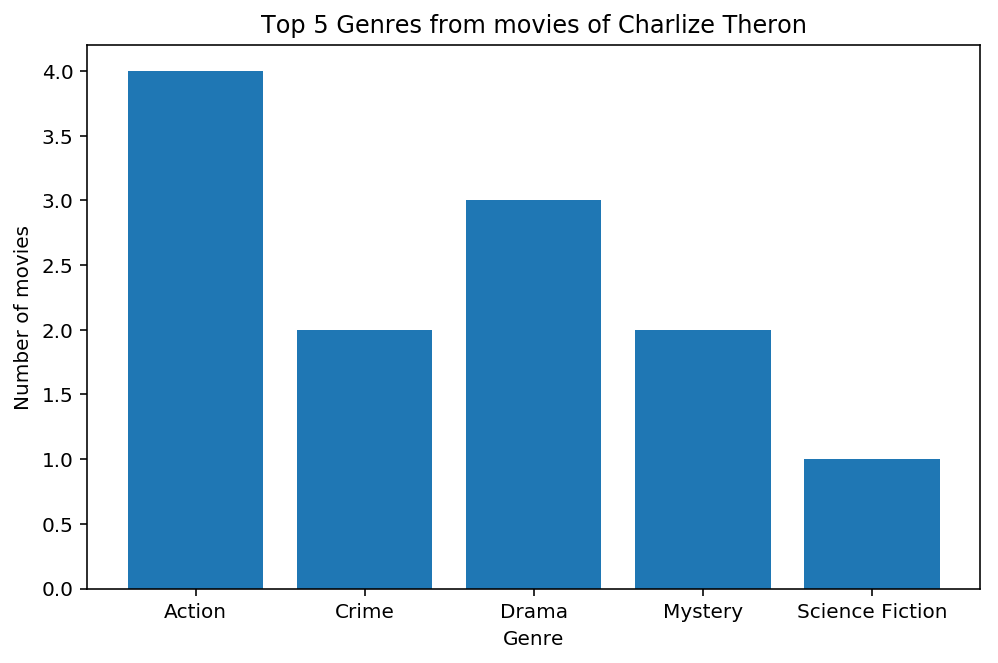

In [176]:
#Set top genres Scarlett Johannson
df_scar_gen=df_scar.groupby('genres', sort=True).id.count()
df_scar_gen=df_scar_gen.sort_values(ascending=False)
df_scar_gen=df_scar_gen[0:5] ##Only 5 first

#Set top genres Charlize Theron
df_char_gen=df_char.groupby('genres', sort=True).id.count()
df_char_gen=df_char_gen.sort_values(ascending=False)
df_char_gen=df_char_gen[0:5] ##Only 5 first

#plotting the results
plt.subplots(figsize=(8, 5))
plt.bar(df_scar_gen.index, df_scar_gen)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Top 5 Genres from movies of Scarlett Johansson');

#plotting the results
plt.subplots(figsize=(8, 5))
plt.bar(df_char_gen.index, df_char_gen)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Top 5 Genres from movies of Charlize Theron');

>**Note:** Scarlet has more drama movies followed by thriller, instead, Charlize has more action movies, followed by drama movies.

### Interesting charts from the dataset (Not question-related, but gave me perspective of the data)

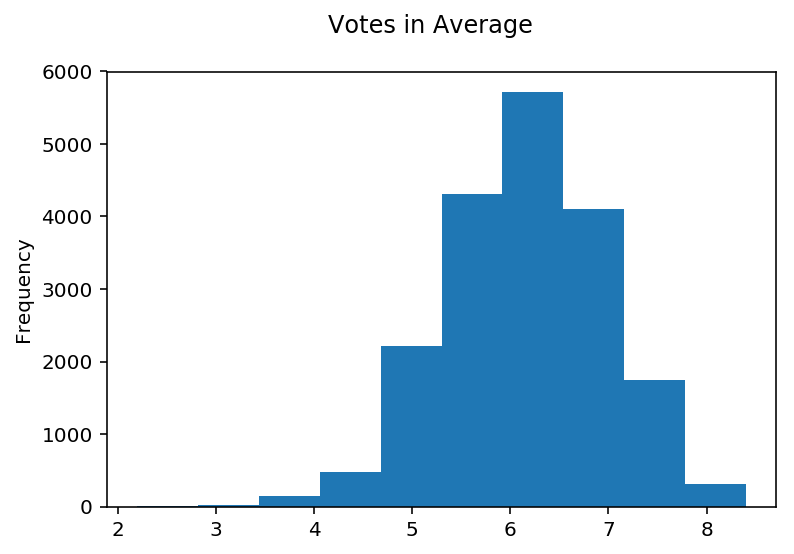

In [172]:
#Histogram from the average of votes from all the movies.
df['vote_average'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Votes in Average' );


>**Note:** Most of the movies are rated around 6 - 6.5.

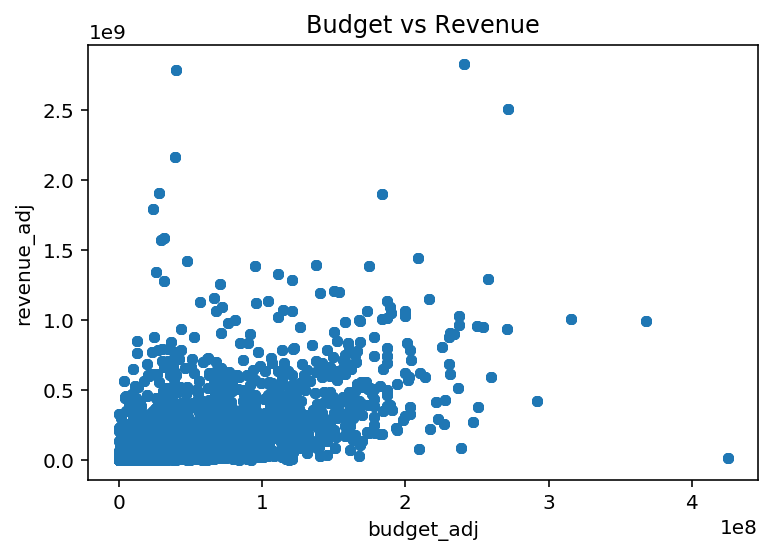

In [178]:
#Scatter comparing budget with revenues
df.plot(x='budget_adj', y='revenue_adj', kind='scatter', title='Budget vs Revenue');

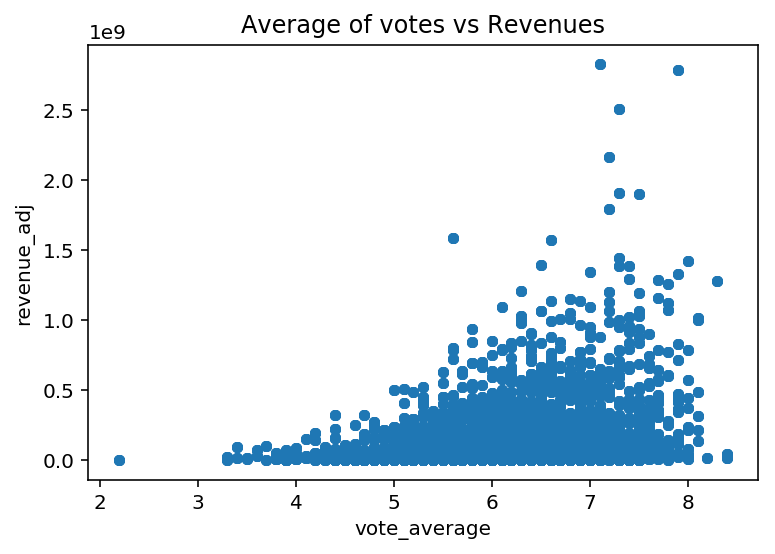

In [179]:
#Scatter comparing vote_average with revenues
df.plot(x='vote_average', y='revenue_adj', kind='scatter', title='Average of votes vs Revenues');

>**Note:** These graphic shows a curvilinear relationship, left-skewed.

***

<a id='conclusions'></a>
## Conclusions

This project has had so many challenges especially when it comes from the data cleaning, I almost gave up with the split of the string because I must take 3 o 4 different approaches. But eventually came up with a solution that works fine with my analysis.<br>
I had to drop all the values that had 0 in budget and revenues even though I knew this would affect my analysis, and trust me because I had to re-analyze my two questions; so I know how much it had change. I had to make this decision because I ran with a conflict in my code. My plan was to drop all the values that had 0 in both columns, and then, fill the ones that remain with the mean of each column, but these new floats change the datatype of every column that was initially an integer so instead of doing all the splitting of row again, I drop these values.<br>

I think this dataset would have being more interesting if it had the genre from each actor, I could calculate the average of female roles in the movies, or wich director involve more female in their movies. Is just an observation that would be interesting to improve in this dataset.

#### First research:
I came up with interesting results in this first analysis, for example, there are more movies in 2011 than 2013 and in third place 2010, that's the main reason why I chose to work with those two first years. <br>
I also find out that in this dataset there are **20 different genres** and the ones with more movies are **drama** followed by **comedy**.<br>

In this dataset, I find that the majority of movies are of the genre __drama__, both in 2011 and 2013. The exact order from the top 5 in 2011 is drama, comedy, action, thriller, and romance. In 2013 the top 5 are:drama, thriller, action, comedy and crime.<br>
From 2011 to 2013 the genre that has more decrease is __comedy__, followed by thriller and action. <br>
As I said in the question, just because there are more movies from a particular genre this doesn't mean that that genre is the best evaluated from the public, so I had to cross information with the average value (which mean the rating from each movie). From this analysis, I came up that __drama__ is the one with the highest percentage of the best score in both years, which makes it the best-scored genre in both years. In 2011 is followed by comedy and action, and in 2013 is followed by thriller and comedy.<br>

When I compare the __genres by the revenue__ that each movie made I had the next result. In __2011__,theres a tie between __action__ and __adventure__ about the highest percentage of income, followed by comedy. But in __2013__, __adventure__ is in the first place, followed by action and science fiction.<br>

When I compare the budget that each movie has and grouped by the genre I had the next result. Both pie charts have the similar result, in the **first place** is **action**, but in 2011 comedy is in third place, whereas in 2013, drama is in third place.

#### Second research:
In this comparision between my two favorite actress, this dataset only have data from __20 movies__ from __Charlize Theron__ and __22__ movies from __Scarlett Johansson__.
One of the first observation that I get is that __Scarlett Johansson__ has more movies around __120 - 130 min__ of length, way close is Charlize inside in the same range, with more movies around **125 - 130 min** of length.

In my second measuring, I wanted to know the number of  votes rate from all the movies that each one have made and I came with the next resul, Most of __Scarlet movies__ are rated between __(5.5 - 6.7) and (7 - 8)__  approximately, and in the case of __Charlize__, most of her movies are rated between __5.4 - 6.5.__.

It also wanted to know how much of revenue each actress has made from the movies in what they were involved and which one had more revenue, in total __Scarlett movies__ has made __5.8 bln__ and __Charlize movies__ has made __2.8 bln__ in revenues. When I compare the budget invest the result is the next, Scarlett movies had __1.43 bln__ and Charlize movies had **1.42 bln** in budget invest in their movies.<br>

In my last analysis, I wanted to know in which genres they had more roles so after a few lines of codes I find out that __Scarlet__ has more __comedy movies__ followed by thriller, instead, __Charlize__ has a more __action__ and __drama__ movies.

**In conclusion, there's still a lot of things to analyze but all these observations that I got from this dataset are super interesting because any production company could find out insight to make better decisions.**